In [99]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

In [100]:
# all the fields 
fields     = ["Category", "Video id","Name","Sound quality",
              "Occlusions", "Visible face", "Level of pose",
              "Language", "Depression", "Speech", "Self-harm",
              "Eye gaze", "Discard", "Frontal / Non-frontal",
              "Video quality", "Distress (0) vs. Suicide (1)",
              "Multiple people", "Selfie", "Gender", "Age", "Ethnicity",
              "Short-term/Chronic distress", "Crying", "Start time",
              "End time", "Hopelessness", "Anhedonia", "Impulsiveness",
              "Lability","Guilt","Entrapment","Social Alienation","Comments"]
# FILE MAPPING
MAPPING = {}
f = open("mapped_csv_2nd_round_annotations.tsv")
for l in f.readlines():
    split = l.split('\t')
    MAPPING[int(split[-1])] = dict(zip(fields, split[:-1]))

MAPPING.pop(37, None)
# Speech features to extract 
features   = [("F1", "GeMAPSv01a.conf__F1frequency_sma3nz_amean"),
              ("F2", "GeMAPSv01a.conf__F2frequency_sma3nz_amean"),
              ("F3", "GeMAPSv01a.conf__F3frequency_sma3nz_amean"),
              ("F1_bandwidth", "eGeMAPSv01a.conf__F1bandwidth_sma3nz_amean"),
              ("F2_bandwidth", "eGeMAPSv01a.conf__F2bandwidth_sma3nz_amean"),
              ("F3_bandwidth", "eGeMAPSv01a.conf__F3bandwidth_sma3nz_amean"),
              ("loudness", "eGeMAPSv01a.conf__loudness_sma3_amean"),
              ("spectral_flux", "eGeMAPSv01a.conf__spectralFlux_sma3_amean"),
              ("voiced_segments", "eGeMAPSv01a.conf__VoicedSegmentsPerSec")
             ]

In [101]:
def get_opensmile_params(indir, mappings=MAPPING, feats=features):
    # get all json files
    results = {}
    for root, dirs, files in os.walk(indir):
        for f in files:
            if f.endswith(".json"):
                fid = int(f.split("_")[0])
                data = json.load(open(os.path.join(root, f), 'r'))
                results[fid] = dict(zip([x[0] for x in feats], [float(data[x[1]]) for x in feats]))
    return results

In [102]:
def plot_data(plots, results, mapping=MAPPING):
    # fields2plot = [[("Gender", "M"), ("F1")],...]
    data2plot = []
    for plot in plots:
        x, y = [], []
        for idx in mapping.keys():
            if all([mapping[idx][col[0]] == col[1] for col in plot[:-1]]):
                try: # file 036 is missing from my speech features
                    y.append(results[idx][plot[-1]]) # append Y
                except:
                    continue
                x.append(int(plot[-2][1]))
        data2plot.append({"x": x, "y": y})
    return data2plot

In [103]:
results = get_opensmile_params("/share/workhorse3/mahmoudi/final_trimed_opensmile_mapped")

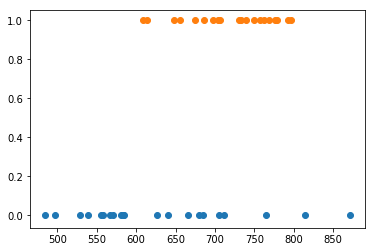

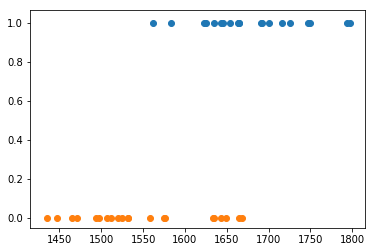

In [104]:
axes = plot_data([[("Gender", "M"), ("Distress (0) vs. Suicide (1)", "0"), ("F1")],
                  [("Gender", "F"), ("Distress (0) vs. Suicide (1)", "1"), ("F1")],
                  
                  [("Gender", "F"), ("Distress (0) vs. Suicide (1)", "1"), ("F2")],
                  [("Gender", "M"), ("Distress (0) vs. Suicide (1)", "0"), ("F2")],
                  
                  [("Gender", "M"), ("Distress (0) vs. Suicide (1)", "0"), ("F3")],
                  [("Gender", "M"), ("Distress (0) vs. Suicide (1)", "1"), ("F3")],
                 ], results)


plt.scatter(axes[0]["y"], axes[0]["x"])
plt.scatter(axes[1]["y"], axes[1]["x"])
plt.show()

plt.scatter(axes[2]["y"], axes[2]["x"])
plt.scatter(axes[3]["y"], axes[3]["x"])
plt.show()

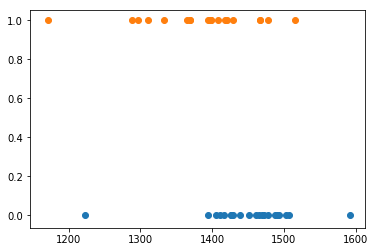

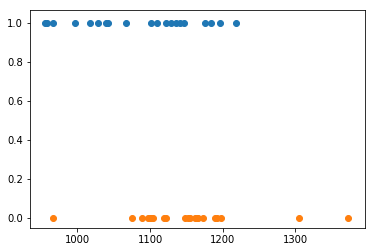

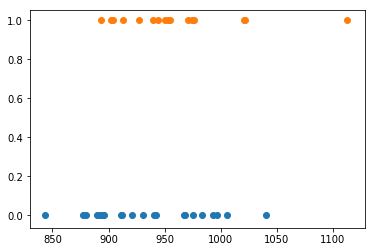

In [14]:
axes1 = plot_data([[("Gender", "M"), ("Distress (0) vs. Suicide (1)", "0"), ("F1_bandwidth")],
                   [("Gender", "F"), ("Distress (0) vs. Suicide (1)", "1"), ("F1_bandwidth")],
                  
                   [("Gender", "F"), ("Distress (0) vs. Suicide (1)", "1"), ("F2_bandwidth")],
                   [("Gender", "M"), ("Distress (0) vs. Suicide (1)", "0"), ("F2_bandwidth")],
                  
                   [("Gender", "M"), ("Distress (0) vs. Suicide (1)", "0"), ("F3_bandwidth")],
                   [("Gender", "M"), ("Distress (0) vs. Suicide (1)", "1"), ("F3_bandwidth")],
                 ], results)

plt.scatter(axes1[0]["y"], axes1[0]["x"])
plt.scatter(axes1[1]["y"], axes1[1]["x"])
plt.show()

plt.scatter(axes1[2]["y"], axes1[2]["x"])
plt.scatter(axes1[3]["y"], axes1[3]["x"])
plt.show()

plt.scatter(axes1[4]["y"], axes1[4]["x"])
plt.scatter(axes1[5]["y"], axes1[5]["x"])
plt.show()

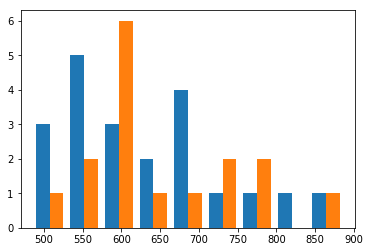

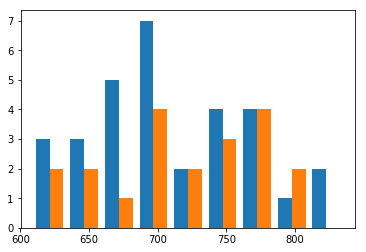

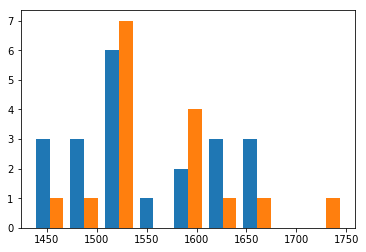

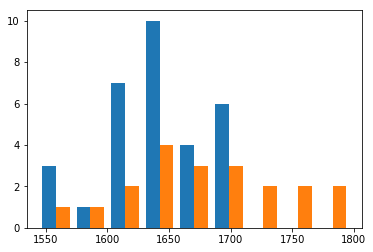

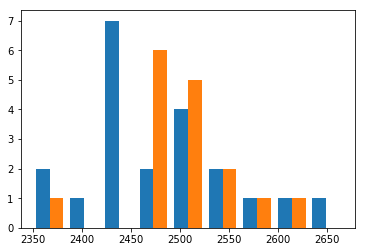

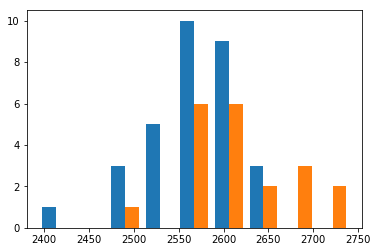

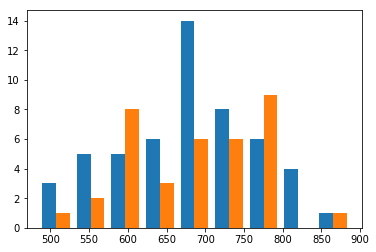

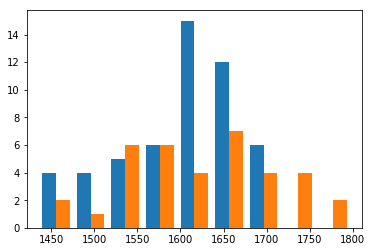

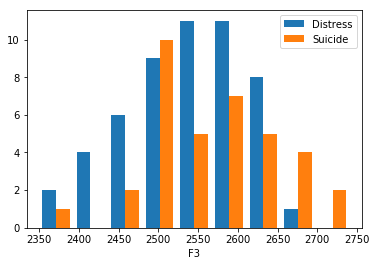

In [134]:
# axes1[0]["y"], axes1[0]["x"]
# axes

axes = plot_data([[("Gender", "M"), ("Distress (0) vs. Suicide (1)", "0"), ("F1")],
                  [("Gender", "M"), ("Distress (0) vs. Suicide (1)", "1"), ("F1")],
                  
                  [("Gender", "F"), ("Distress (0) vs. Suicide (1)", "0"), ("F1")],
                  [("Gender", "F"), ("Distress (0) vs. Suicide (1)", "1"), ("F1")],
                  
                  
                  [("Gender", "M"), ("Distress (0) vs. Suicide (1)", "0"), ("F2")],
                  [("Gender", "M"), ("Distress (0) vs. Suicide (1)", "1"), ("F2")],
                  
                  [("Gender", "F"), ("Distress (0) vs. Suicide (1)", "0"), ("F2")],
                  [("Gender", "F"), ("Distress (0) vs. Suicide (1)", "1"), ("F2")],
                  
                  [("Gender", "M"), ("Distress (0) vs. Suicide (1)", "0"), ("F3")],
                  [("Gender", "M"), ("Distress (0) vs. Suicide (1)", "1"), ("F3")],
                  
                  [("Gender", "F"), ("Distress (0) vs. Suicide (1)", "0"), ("F3")],
                  [("Gender", "F"), ("Distress (0) vs. Suicide (1)", "1"), ("F3")],
                  
                  [("Distress (0) vs. Suicide (1)", "0"), ("F1")],
                  [("Distress (0) vs. Suicide (1)", "1"), ("F1")],
                  
                  [("Distress (0) vs. Suicide (1)", "0"), ("F2")],
                  [("Distress (0) vs. Suicide (1)", "1"), ("F2")],
                  
                  [("Distress (0) vs. Suicide (1)", "0"), ("F3")],
                  [("Distress (0) vs. Suicide (1)", "1"), ("F3")],
                 ], results)

plt.hist([axes[0]["y"], axes[1]["y"]], bins=9)
plt.show()

plt.hist([axes[2]["y"],axes[3]["y"]], bins=9)
plt.show()

plt.hist([axes[4]["y"],axes[5]["y"]], bins=9)
plt.show()

plt.hist([axes[6]["y"], axes[7]["y"]], bins=9)
plt.show()

plt.hist([axes[8]["y"], axes[9]["y"]], bins=9)
# plt.hist(, bins=9)
plt.show()

plt.hist([axes[10]["y"],axes[11]["y"]], bins=9)
# plt.hist(, bins=9)
plt.show()


plt.hist([axes[12]["y"],axes[13]["y"]], bins=9)
plt.show()
plt.hist([axes[14]["y"],axes[15]["y"]], bins=9)
plt.show()
plt.hist([axes[16]["y"],axes[17]["y"]], bins=9)
plt.xlabel("F3")
plt.legend(["Distress", "Suicide"])
plt.show()

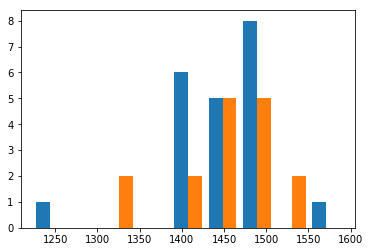

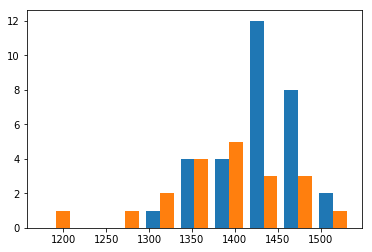

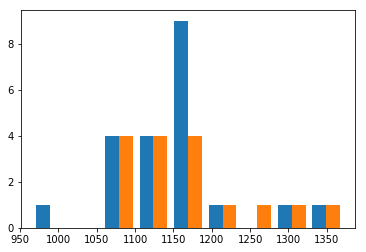

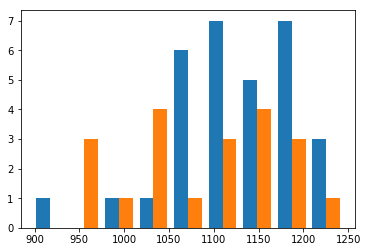

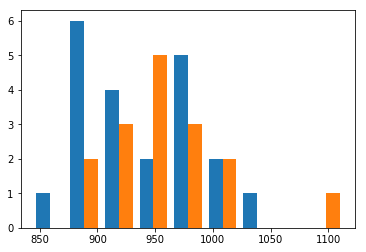

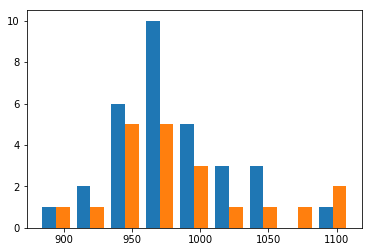

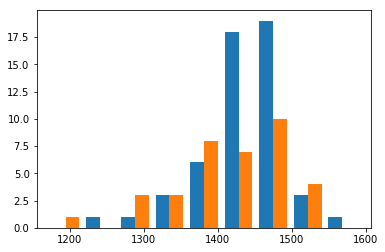

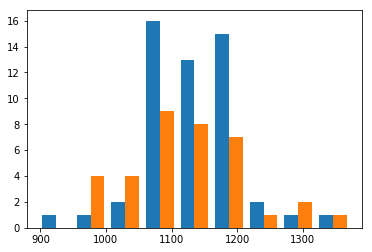

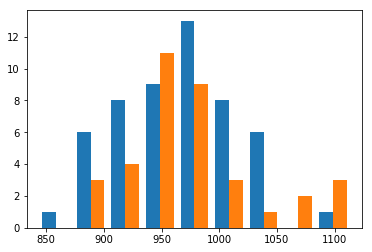

In [51]:
axes1 = plot_data([[("Gender", "M"), ("Distress (0) vs. Suicide (1)", "0"), ("F1_bandwidth")],
                  [("Gender", "M"), ("Distress (0) vs. Suicide (1)", "1"), ("F1_bandwidth")],
                  
                  [("Gender", "F"), ("Distress (0) vs. Suicide (1)", "0"), ("F1_bandwidth")],
                  [("Gender", "F"), ("Distress (0) vs. Suicide (1)", "1"), ("F1_bandwidth")],
                  
                  
                  [("Gender", "M"), ("Distress (0) vs. Suicide (1)", "0"), ("F2_bandwidth")],
                  [("Gender", "M"), ("Distress (0) vs. Suicide (1)", "1"), ("F2_bandwidth")],
                  
                  [("Gender", "F"), ("Distress (0) vs. Suicide (1)", "0"), ("F2_bandwidth")],
                  [("Gender", "F"), ("Distress (0) vs. Suicide (1)", "1"), ("F2_bandwidth")],
                  
                  [("Gender", "M"), ("Distress (0) vs. Suicide (1)", "0"), ("F3_bandwidth")],
                  [("Gender", "M"), ("Distress (0) vs. Suicide (1)", "1"), ("F3_bandwidth")],
                  
                  [("Gender", "F"), ("Distress (0) vs. Suicide (1)", "0"), ("F3_bandwidth")],
                  [("Gender", "F"), ("Distress (0) vs. Suicide (1)", "1"), ("F3_bandwidth")],
                  
                  [("Distress (0) vs. Suicide (1)", "0"), ("F1_bandwidth")],
                  [("Distress (0) vs. Suicide (1)", "1"), ("F1_bandwidth")],
                  
                  [("Distress (0) vs. Suicide (1)", "0"), ("F2_bandwidth")],
                  [("Distress (0) vs. Suicide (1)", "1"), ("F2_bandwidth")],
                  
                  [("Distress (0) vs. Suicide (1)", "0"), ("F3_bandwidth")],
                  [("Distress (0) vs. Suicide (1)", "1"), ("F3_bandwidth")],
                 ], results)

plt.hist([axes1[0]["y"], axes1[1]["y"]], bins=9)
plt.show()

plt.hist([axes1[2]["y"],axes1[3]["y"]], bins=9)
plt.show()

plt.hist([axes1[4]["y"],axes1[5]["y"]], bins=9)
plt.show()

plt.hist([axes1[6]["y"], axes1[7]["y"]], bins=9)
plt.show()

plt.hist([axes1[8]["y"], axes1[9]["y"]], bins=9)
# plt.hist(, bins=9)
plt.show()

plt.hist([axes1[10]["y"],axes1[11]["y"]], bins=9)
# plt.hist(, bins=9)
plt.show()


plt.hist([axes1[12]["y"],axes1[13]["y"]], bins=9)
plt.show()
plt.hist([axes1[14]["y"],axes1[15]["y"]], bins=9)
plt.show()
plt.hist([axes1[16]["y"],axes1[17]["y"]], bins=9)
plt.show()

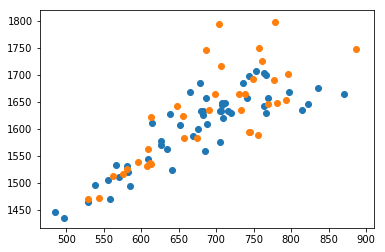

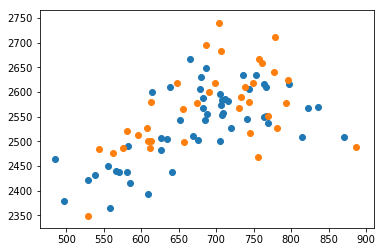

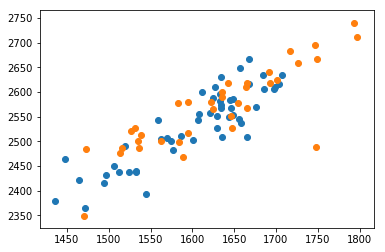

In [57]:
# 2D plots 
# plt.hist([axes[12]["y"],axes[13]["y"]], bins=9)
# plt.show()
# plt.hist([axes[14]["y"],axes[15]["y"]], bins=9)
# plt.show()
# plt.hist([axes[16]["y"],axes[17]["y"]], bins=9)
# plt.show()
# F1-F2
plt.scatter(axes[12]["y"],axes[14]["y"]) # Depression
plt.scatter(axes[13]["y"],axes[15]["y"]) # Suicide
plt.show()
# F1-F3
plt.scatter(axes[12]["y"],axes[16]["y"]) # Depression
plt.scatter(axes[13]["y"],axes[17]["y"]) # Suicide
plt.show()
# F2-F3
plt.scatter(axes[14]["y"],axes[16]["y"]) # Depression
plt.scatter(axes[15]["y"],axes[17]["y"]) # Suicide
plt.show()

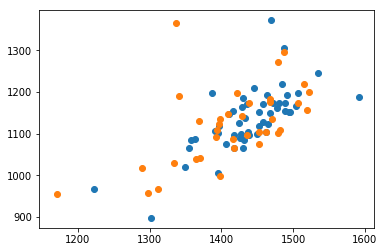

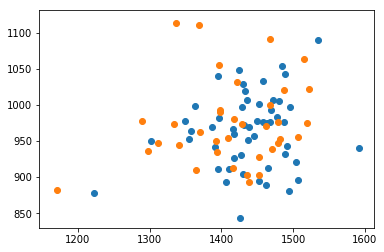

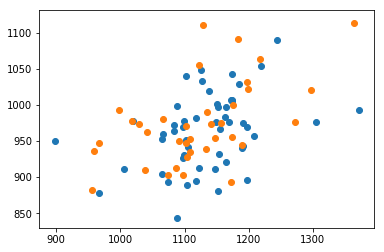

In [58]:
# BANDWIDTH
# F1-F2
plt.scatter(axes1[12]["y"],axes1[14]["y"]) # Depression
plt.scatter(axes1[13]["y"],axes1[15]["y"]) # Suicide
plt.show()
# F1-F3
plt.scatter(axes1[12]["y"],axes1[16]["y"]) # Depression
plt.scatter(axes1[13]["y"],axes1[17]["y"]) # Suicide
plt.show()
# F2-F3
plt.scatter(axes1[14]["y"],axes1[16]["y"]) # Depression
plt.scatter(axes1[15]["y"],axes1[17]["y"]) # Suicide
plt.show()

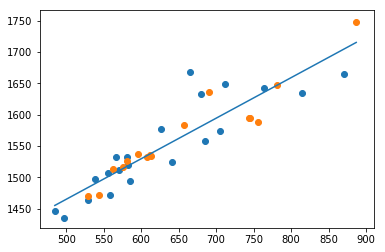

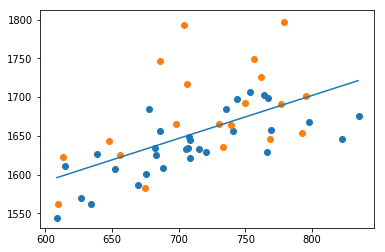

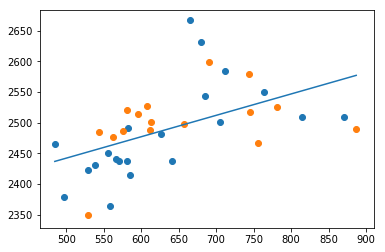

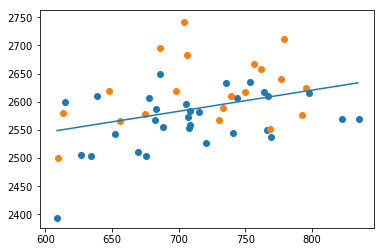

In [74]:
# Gender based
# axes = plot_data([[("Gender", "M"), ("Distress (0) vs. Suicide (1)", "0"), ("F1")],
#                   [("Gender", "M"), ("Distress (0) vs. Suicide (1)", "1"), ("F1")],
                  
#                   [("Gender", "F"), ("Distress (0) vs. Suicide (1)", "0"), ("F1")],
#                   [("Gender", "F"), ("Distress (0) vs. Suicide (1)", "1"), ("F1")],
                  
                  
#                   [("Gender", "M"), ("Distress (0) vs. Suicide (1)", "0"), ("F2")],
#                   [("Gender", "M"), ("Distress (0) vs. Suicide (1)", "1"), ("F2")],
                  
#                   [("Gender", "F"), ("Distress (0) vs. Suicide (1)", "0"), ("F2")],
#                   [("Gender", "F"), ("Distress (0) vs. Suicide (1)", "1"), ("F2")],
                  
#                   [("Gender", "M"), ("Distress (0) vs. Suicide (1)", "0"), ("F3")],
#                   [("Gender", "M"), ("Distress (0) vs. Suicide (1)", "1"), ("F3")],
                  
#                   [("Gender", "F"), ("Distress (0) vs. Suicide (1)", "0"), ("F3")],
#                   [("Gender", "F"), ("Distress (0) vs. Suicide (1)", "1"), ("F3")],
                  
#                   [("Distress (0) vs. Suicide (1)", "0"), ("F1")],
#                   [("Distress (0) vs. Suicide (1)", "1"), ("F1")],
                  
#                   [("Distress (0) vs. Suicide (1)", "0"), ("F2")],
#                   [("Distress (0) vs. Suicide (1)", "1"), ("F2")],
                  
#                   [("Distress (0) vs. Suicide (1)", "0"), ("F3")],
#                   [("Distress (0) vs. Suicide (1)", "1"), ("F3")],
#                  ], results)
# F1-F2 --> M
plt.scatter(axes[0]["y"],axes[4]["y"]) # Depression
plt.scatter(axes[1]["y"],axes[5]["y"]) # Suicide
# fit a line 
line = np.polyfit(axes[0]["y"]+axes[1]["y"], axes[4]["y"]+axes[5]["y"], 1)
all_x = np.arange(min(axes[0]["y"]+axes[1]["y"]), max(axes[0]["y"]+axes[1]["y"]))
y = line[0]*all_x + line[1]
plt.plot(all_x, y)
plt.show()

# F1-F2 --> F
plt.scatter(axes[2]["y"],axes[6]["y"]) # Depression
plt.scatter(axes[3]["y"],axes[7]["y"]) # Suicide
# fit a line 
line = np.polyfit(axes[2]["y"]+axes[3]["y"], axes[6]["y"]+axes[7]["y"], 1)
all_x = np.arange(min(axes[2]["y"]+axes[3]["y"]), max(axes[2]["y"]+axes[3]["y"]))
y = line[0]*all_x + line[1]
plt.plot(all_x, y)
plt.show()

# F1-F3 --> M
plt.scatter(axes[0]["y"],axes[8]["y"]) # Depression
plt.scatter(axes[1]["y"],axes[9]["y"]) # Suicide
# fit a line 
line = np.polyfit(axes[0]["y"]+axes[1]["y"], axes[8]["y"]+axes[9]["y"], 1)
all_x = np.arange(min(axes[0]["y"]+axes[1]["y"]), max(axes[0]["y"]+axes[1]["y"]))
y = line[0]*all_x + line[1]
plt.plot(all_x, y)
plt.show()

# F1-F3 --> F
plt.scatter(axes[2]["y"],axes[10]["y"]) # Depression
plt.scatter(axes[3]["y"],axes[11]["y"]) # Suicide

# fit a line 
line = np.polyfit(axes[2]["y"]+axes[3]["y"], axes[10]["y"]+axes[11]["y"], 1)
all_x = np.arange(min(axes[2]["y"]+axes[3]["y"]), max(axes[2]["y"]+axes[3]["y"]))
y = line[0]*all_x + line[1]
plt.plot(all_x, y)
plt.show()

# no point
# # F2-F3
# plt.scatter(axes[14]["y"],axes[16]["y"]) # Depression
# plt.scatter(axes[15]["y"],axes[17]["y"]) # Suicide
# plt.show()

# Other psychological constructs

### F1

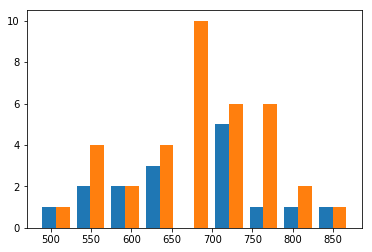

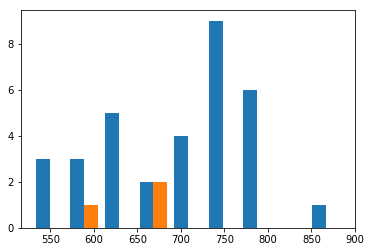

In [80]:
# "Hopelessness", "Anhedonia", "Impulsiveness","Lability","Guilt","Entrapment","Social Alienation"

constructs = plot_data([[("Hopelessness", "yes"), ("Distress (0) vs. Suicide (1)", "0"), ("F1")],
                        [("Hopelessness", "yes"), ("Distress (0) vs. Suicide (1)", "1"), ("F1")],
                        [("Hopelessness", "no"), ("Distress (0) vs. Suicide (1)", "0"), ("F1")],
                        [("Hopelessness", "no"), ("Distress (0) vs. Suicide (1)", "1"), ("F1")],
                 ], results)

plt.hist([constructs[0]["y"], constructs[2]["y"]], bins=9)
plt.show()
plt.hist([constructs[1]["y"], constructs[3]["y"]], bins=9)
plt.show()

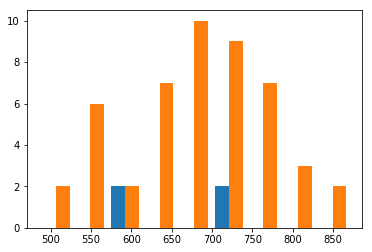

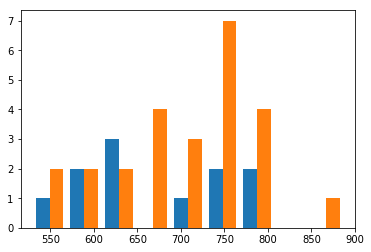

In [81]:
# "Hopelessness", "Anhedonia", "Impulsiveness","Lability","Guilt","Entrapment","Social Alienation"

constructs = plot_data([[("Anhedonia", "yes"), ("Distress (0) vs. Suicide (1)", "0"), ("F1")],
                        [("Anhedonia", "yes"), ("Distress (0) vs. Suicide (1)", "1"), ("F1")],
                        [("Anhedonia", "no"), ("Distress (0) vs. Suicide (1)", "0"), ("F1")],
                        [("Anhedonia", "no"), ("Distress (0) vs. Suicide (1)", "1"), ("F1")],
                 ], results)

plt.hist([constructs[0]["y"], constructs[2]["y"]], bins=9)
plt.show()
plt.hist([constructs[1]["y"], constructs[3]["y"]], bins=9)
plt.show()

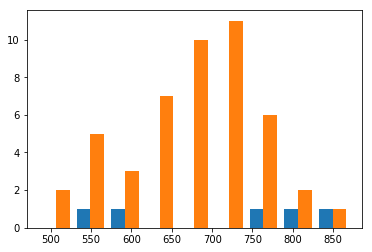

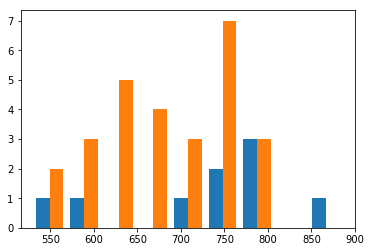

In [82]:
constructs = plot_data([[("Impulsiveness", "yes"), ("Distress (0) vs. Suicide (1)", "0"), ("F1")],
                        [("Impulsiveness", "yes"), ("Distress (0) vs. Suicide (1)", "1"), ("F1")],
                        [("Impulsiveness", "no"), ("Distress (0) vs. Suicide (1)", "0"), ("F1")],
                        [("Impulsiveness", "no"), ("Distress (0) vs. Suicide (1)", "1"), ("F1")],
                 ], results)

plt.hist([constructs[0]["y"], constructs[2]["y"]], bins=9)
plt.show()
plt.hist([constructs[1]["y"], constructs[3]["y"]], bins=9)
plt.show()

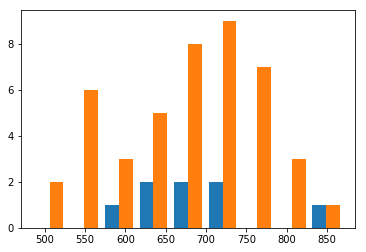

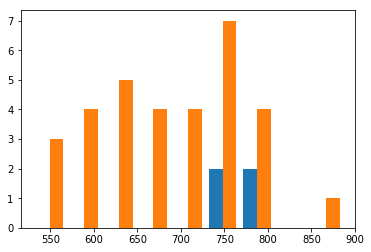

In [83]:
constructs = plot_data([[("Lability", "yes"), ("Distress (0) vs. Suicide (1)", "0"), ("F1")],
                        [("Lability", "yes"), ("Distress (0) vs. Suicide (1)", "1"), ("F1")],
                        [("Lability", "no"), ("Distress (0) vs. Suicide (1)", "0"), ("F1")],
                        [("Lability", "no"), ("Distress (0) vs. Suicide (1)", "1"), ("F1")],
                 ], results)

plt.hist([constructs[0]["y"], constructs[2]["y"]], bins=9)
plt.show()
plt.hist([constructs[1]["y"], constructs[3]["y"]], bins=9)
plt.show()

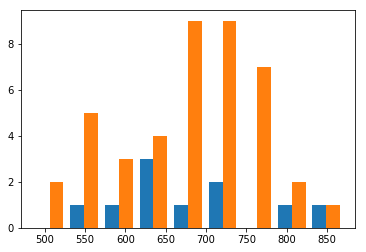

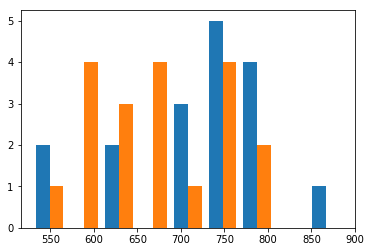

In [84]:
constructs = plot_data([[("Guilt", "yes"), ("Distress (0) vs. Suicide (1)", "0"), ("F1")],
                        [("Guilt", "yes"), ("Distress (0) vs. Suicide (1)", "1"), ("F1")],
                        [("Guilt", "no"), ("Distress (0) vs. Suicide (1)", "0"), ("F1")],
                        [("Guilt", "no"), ("Distress (0) vs. Suicide (1)", "1"), ("F1")],
                 ], results)

plt.hist([constructs[0]["y"], constructs[2]["y"]], bins=9)
plt.show()
plt.hist([constructs[1]["y"], constructs[3]["y"]], bins=9)
plt.show()

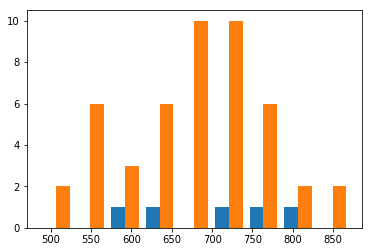

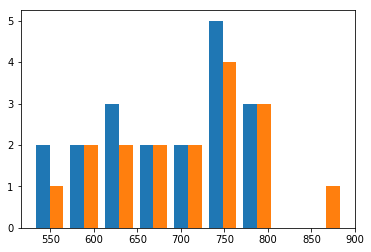

In [86]:
constructs = plot_data([[("Entrapment", "yes"), ("Distress (0) vs. Suicide (1)", "0"), ("F1")],
                        [("Entrapment", "yes"), ("Distress (0) vs. Suicide (1)", "1"), ("F1")],
                        [("Entrapment", "no"), ("Distress (0) vs. Suicide (1)", "0"), ("F1")],
                        [("Entrapment", "no"), ("Distress (0) vs. Suicide (1)", "1"), ("F1")],
                 ], results)

plt.hist([constructs[0]["y"], constructs[2]["y"]], bins=9)
plt.show()
plt.hist([constructs[1]["y"], constructs[3]["y"]], bins=9)
plt.show()

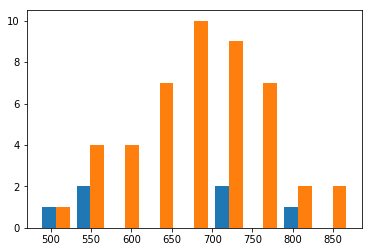

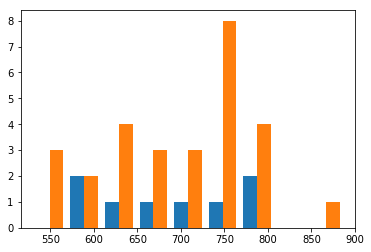

In [87]:
constructs = plot_data([[("Social Alienation", "yes"), ("Distress (0) vs. Suicide (1)", "0"), ("F1")],
                        [("Social Alienation", "yes"), ("Distress (0) vs. Suicide (1)", "1"), ("F1")],
                        [("Social Alienation", "no"), ("Distress (0) vs. Suicide (1)", "0"), ("F1")],
                        [("Social Alienation", "no"), ("Distress (0) vs. Suicide (1)", "1"), ("F1")],
                 ], results)

plt.hist([constructs[0]["y"], constructs[2]["y"]], bins=9)
plt.show()
plt.hist([constructs[1]["y"], constructs[3]["y"]], bins=9)
plt.show()

### F2

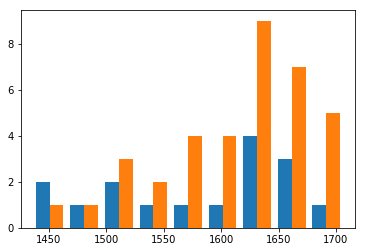

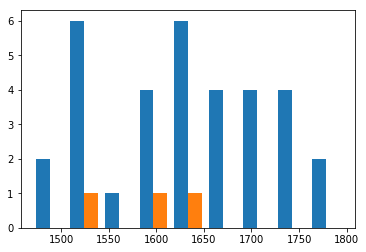

In [88]:
# "Hopelessness", "Anhedonia", "Impulsiveness","Lability","Guilt","Entrapment","Social Alienation"

constructs = plot_data([[("Hopelessness", "yes"), ("Distress (0) vs. Suicide (1)", "0"), ("F2")],
                        [("Hopelessness", "yes"), ("Distress (0) vs. Suicide (1)", "1"), ("F2")],
                        [("Hopelessness", "no"), ("Distress (0) vs. Suicide (1)", "0"), ("F2")],
                        [("Hopelessness", "no"), ("Distress (0) vs. Suicide (1)", "1"), ("F2")],
                 ], results)

plt.hist([constructs[0]["y"], constructs[2]["y"]], bins=9)
plt.show()
plt.hist([constructs[1]["y"], constructs[3]["y"]], bins=9)
plt.show()

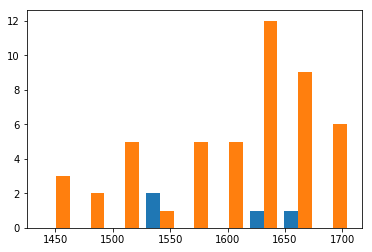

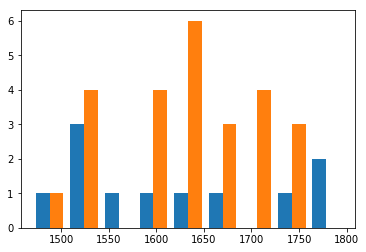

In [89]:
constructs = plot_data([[("Anhedonia", "yes"), ("Distress (0) vs. Suicide (1)", "0"), ("F2")],
                        [("Anhedonia", "yes"), ("Distress (0) vs. Suicide (1)", "1"), ("F2")],
                        [("Anhedonia", "no"), ("Distress (0) vs. Suicide (1)", "0"), ("F2")],
                        [("Anhedonia", "no"), ("Distress (0) vs. Suicide (1)", "1"), ("F2")],
                 ], results)

plt.hist([constructs[0]["y"], constructs[2]["y"]], bins=9)
plt.show()
plt.hist([constructs[1]["y"], constructs[3]["y"]], bins=9)
plt.show()

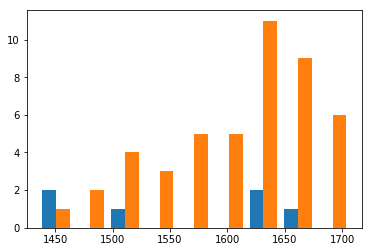

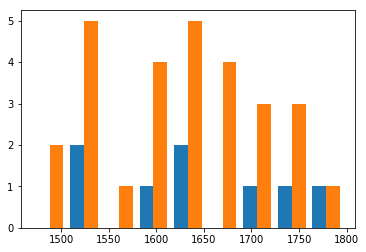

In [90]:
constructs = plot_data([[("Social Alienation", "yes"), ("Distress (0) vs. Suicide (1)", "0"), ("F2")],
                        [("Social Alienation", "yes"), ("Distress (0) vs. Suicide (1)", "1"), ("F2")],
                        [("Social Alienation", "no"), ("Distress (0) vs. Suicide (1)", "0"), ("F2")],
                        [("Social Alienation", "no"), ("Distress (0) vs. Suicide (1)", "1"), ("F2")],
                 ], results)

plt.hist([constructs[0]["y"], constructs[2]["y"]], bins=9)
plt.show()
plt.hist([constructs[1]["y"], constructs[3]["y"]], bins=9)
plt.show()

# Other audio features

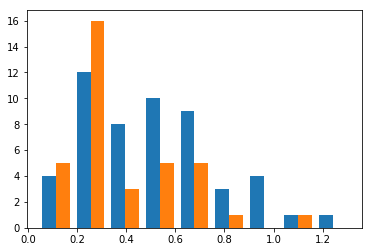

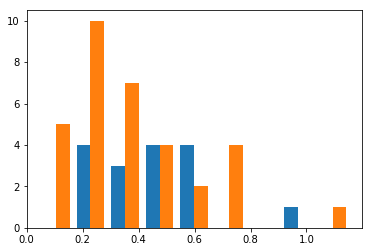

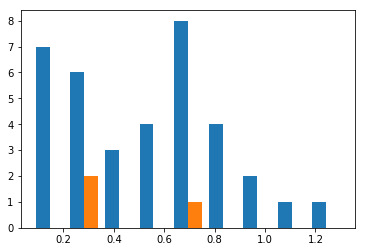

In [109]:
loudness = plot_data([[("Distress (0) vs. Suicide (1)", "0"), ("loudness")],
                     [("Distress (0) vs. Suicide (1)", "1"), ("loudness")],  
                     [("Hopelessness", "yes"), ("Distress (0) vs. Suicide (1)", "0"), ("loudness")],
                     [("Hopelessness", "yes"), ("Distress (0) vs. Suicide (1)", "1"), ("loudness")],
                     [("Hopelessness", "no"), ("Distress (0) vs. Suicide (1)", "0"), ("loudness")],
                     [("Hopelessness", "no"), ("Distress (0) vs. Suicide (1)", "1"), ("loudness")],
                 ], results)

plt.hist([loudness[0]["y"], loudness[1]["y"]], bins=9)
plt.show()

plt.hist([loudness[2]["y"], loudness[3]["y"]], bins=9)
plt.show()

plt.hist([loudness[4]["y"], loudness[5]["y"]], bins=9)
plt.show()

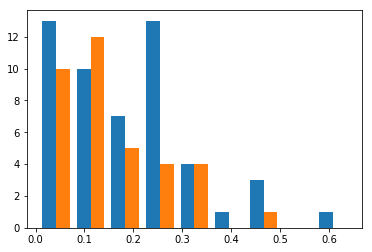

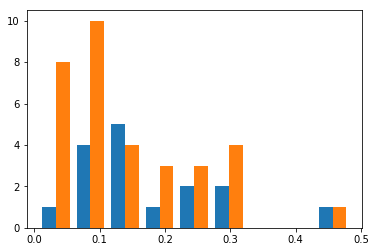

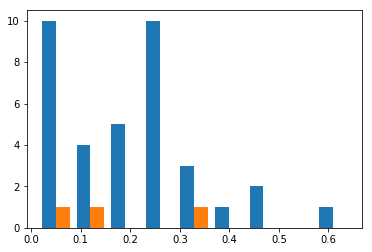

In [110]:
flux = plot_data([[("Distress (0) vs. Suicide (1)", "0"), ("spectral_flux")],
                     [("Distress (0) vs. Suicide (1)", "1"), ("spectral_flux")],  
                     [("Hopelessness", "yes"), ("Distress (0) vs. Suicide (1)", "0"), ("spectral_flux")],
                     [("Hopelessness", "yes"), ("Distress (0) vs. Suicide (1)", "1"), ("spectral_flux")],
                     [("Hopelessness", "no"), ("Distress (0) vs. Suicide (1)", "0"), ("spectral_flux")],
                     [("Hopelessness", "no"), ("Distress (0) vs. Suicide (1)", "1"), ("spectral_flux")],
                 ], results)

plt.hist([flux[0]["y"], flux[1]["y"]], bins=9)
plt.show()

plt.hist([flux[2]["y"], flux[3]["y"]], bins=9)
plt.show()

plt.hist([flux[4]["y"], flux[5]["y"]], bins=9)
plt.show()

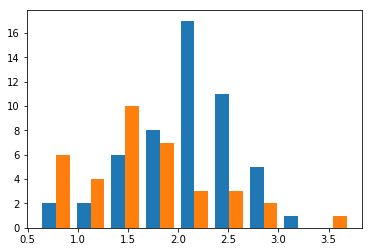

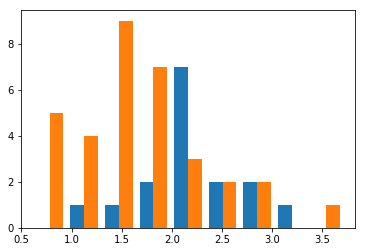

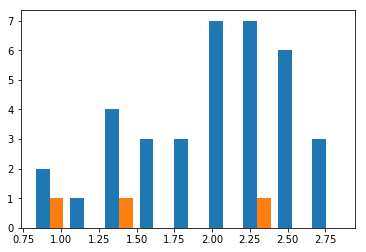

In [111]:
voiced = plot_data([[("Distress (0) vs. Suicide (1)", "0"), ("voiced_segments")],
                     [("Distress (0) vs. Suicide (1)", "1"), ("voiced_segments")],  
                     [("Hopelessness", "yes"), ("Distress (0) vs. Suicide (1)", "0"), ("voiced_segments")],
                     [("Hopelessness", "yes"), ("Distress (0) vs. Suicide (1)", "1"), ("voiced_segments")],
                     [("Hopelessness", "no"), ("Distress (0) vs. Suicide (1)", "0"), ("voiced_segments")],
                     [("Hopelessness", "no"), ("Distress (0) vs. Suicide (1)", "1"), ("voiced_segments")],
                 ], results)

plt.hist([voiced[0]["y"], voiced[1]["y"]], bins=9)
plt.show()

plt.hist([voiced[2]["y"], voiced[3]["y"]], bins=9)
plt.show()

plt.hist([voiced[4]["y"], voiced[5]["y"]], bins=9)
plt.show()

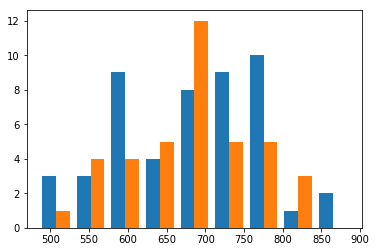

In [114]:
f1_results = plot_data([[("Hopelessness", "yes"), ("Distress (0) vs. Suicide (1)", "0"), ("F1")],
                        [("Hopelessness", "yes"), ("Distress (0) vs. Suicide (1)", "1"), ("F1")],
                        [("Hopelessness", "no"), ("Distress (0) vs. Suicide (1)", "0"), ("F1")],
                        [("Hopelessness", "no"), ("Distress (0) vs. Suicide (1)", "1"), ("F1")],
                 ], results)

plt.hist([f1_results[0]["y"]+f1_results[1]["y"], f1_results[2]["y"]+f1_results[3]["y"]], bins=9)
plt.show()

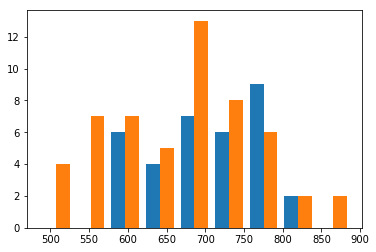

In [116]:
crying_results = plot_data([[("Crying", "yes"), ("Distress (0) vs. Suicide (1)", "0"), ("F1")],
                        [("Crying", "yes"), ("Distress (0) vs. Suicide (1)", "1"), ("F1")],
                        [("Crying", "no"), ("Distress (0) vs. Suicide (1)", "0"), ("F1")],
                        [("Crying", "no"), ("Distress (0) vs. Suicide (1)", "1"), ("F1")],
                 ], results)

plt.hist([crying_results[0]["y"]+crying_results[1]["y"], crying_results[2]["y"]+crying_results[3]["y"]], bins=9)
plt.show()

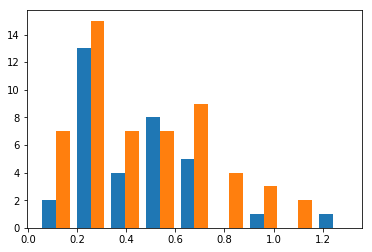

In [117]:
crying_results = plot_data([[("Crying", "yes"), ("Distress (0) vs. Suicide (1)", "0"), ("loudness")],
                        [("Crying", "yes"), ("Distress (0) vs. Suicide (1)", "1"), ("loudness")],
                        [("Crying", "no"), ("Distress (0) vs. Suicide (1)", "0"), ("loudness")],
                        [("Crying", "no"), ("Distress (0) vs. Suicide (1)", "1"), ("loudness")],
                 ], results)

plt.hist([crying_results[0]["y"]+crying_results[1]["y"], crying_results[2]["y"]+crying_results[3]["y"]], bins=9)
plt.show()

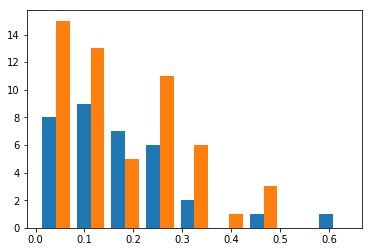

In [118]:
crying_results = plot_data([[("Crying", "yes"), ("Distress (0) vs. Suicide (1)", "0"), ("spectral_flux")],
                        [("Crying", "yes"), ("Distress (0) vs. Suicide (1)", "1"), ("spectral_flux")],
                        [("Crying", "no"), ("Distress (0) vs. Suicide (1)", "0"), ("spectral_flux")],
                        [("Crying", "no"), ("Distress (0) vs. Suicide (1)", "1"), ("spectral_flux")],
                 ], results)

plt.hist([crying_results[0]["y"]+crying_results[1]["y"], crying_results[2]["y"]+crying_results[3]["y"]], bins=9)
plt.show()

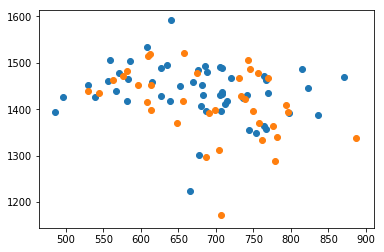

In [129]:
f1_bandwidth_results = plot_data([[("Distress (0) vs. Suicide (1)", "0"), ("F1")],
                                  [("Distress (0) vs. Suicide (1)", "1"), ("F1")],
                                  [("Distress (0) vs. Suicide (1)", "0"), ("F1_bandwidth")],
                                  [("Distress (0) vs. Suicide (1)", "1"), ("F1_bandwidth")],
                 ], results)

plt.scatter(f1_bandwidth_results[0]["y"], f1_bandwidth_results[2]["y"])
plt.scatter(f1_bandwidth_results[1]["y"], f1_bandwidth_results[3]["y"])
plt.show()
# "Depression"

[{'x': [], 'y': []}, {'x': [], 'y': []}, {'x': [], 'y': []}, {'x': [], 'y': []}, {'x': [], 'y': []}, {'x': [], 'y': []}]


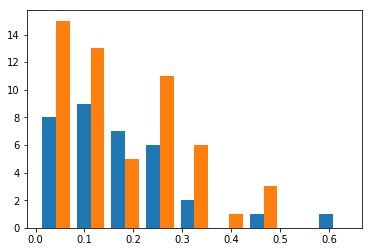

In [133]:
depression_results = plot_data([[("Depression", "0"), ("Distress (0) vs. Suicide (1)", "0"), ("F1")],
                                [("Depression", "1"), ("Distress (0) vs. Suicide (1)", "0"), ("F1")],
                                [("Depression", "2"), ("Distress (0) vs. Suicide (1)", "0"), ("F1")],
                                [("Depression", "3"), ("Distress (0) vs. Suicide (1)", "0"), ("F1")],
                                [("Depression", "4"), ("Distress (0) vs. Suicide (1)", "0"), ("F1")],
                                [("Depression", "5"), ("Distress (0) vs. Suicide (1)", "0"), ("F1")],
                 ], results)

print(depression_results)
plt.hist([crying_results[0]["y"]+crying_results[1]["y"], crying_results[2]["y"]+crying_results[3]["y"]], bins=9)
plt.show()